# project title :- Olist Marketplace Intelligence: Customer, Sales & Delivery Insights with SQL & Power BI

# goal :- Perfect — defining a clear **project goal** will align our insights, SQL logic, and Power BI dashboards effectively.

---

## 🎯 Project Goal (Olist E-commerce)

> **“Analyze customer behavior, order performance, seller efficiency, and product profitability to improve marketplace operations, enhance customer satisfaction, and optimize logistics.”**

---

## 🧩 Sub-Goals & Dimensions

To break this into measurable parts, we’ll focus on **4 pillars**:

### 1. **Customer Insights**

* Understand who the customers are, where they’re located, and how they behave (order frequency, retention, satisfaction).

### 2. **Sales & Payment Analysis**

* Monitor revenue, payment types, and order trends over time.

### 3. **Product & Seller Performance**

* Identify high-performing products and sellers, evaluate reviews, and compare categories.

### 4. **Delivery & Logistics**

* Assess delivery delays, freight costs, geographic challenges, and timing impact on satisfaction.







In [ ]:
# import all required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# sql
import sqlite3 as sql
#warning
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# load all csv file like this
customers = pd.read_csv('olist_customers_dataset.csv')
geolocation = pd.read_csv('olist_geolocation_dataset.csv')
order_items = pd.read_csv('olist_order_items_dataset.csv')
order_payments = pd.read_csv('olist_order_payments_dataset.csv')
order_reviews = pd.read_csv('olist_order_reviews_dataset.csv')
orders = pd.read_csv('olist_orders_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
sellers = pd.read_csv('olist_sellers_dataset.csv')
product_category_name_translation = pd.read_csv('product_category_name_translation.csv')

In [ ]:
# customer info
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [ ]:
geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [ ]:
geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [ ]:
#product info
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


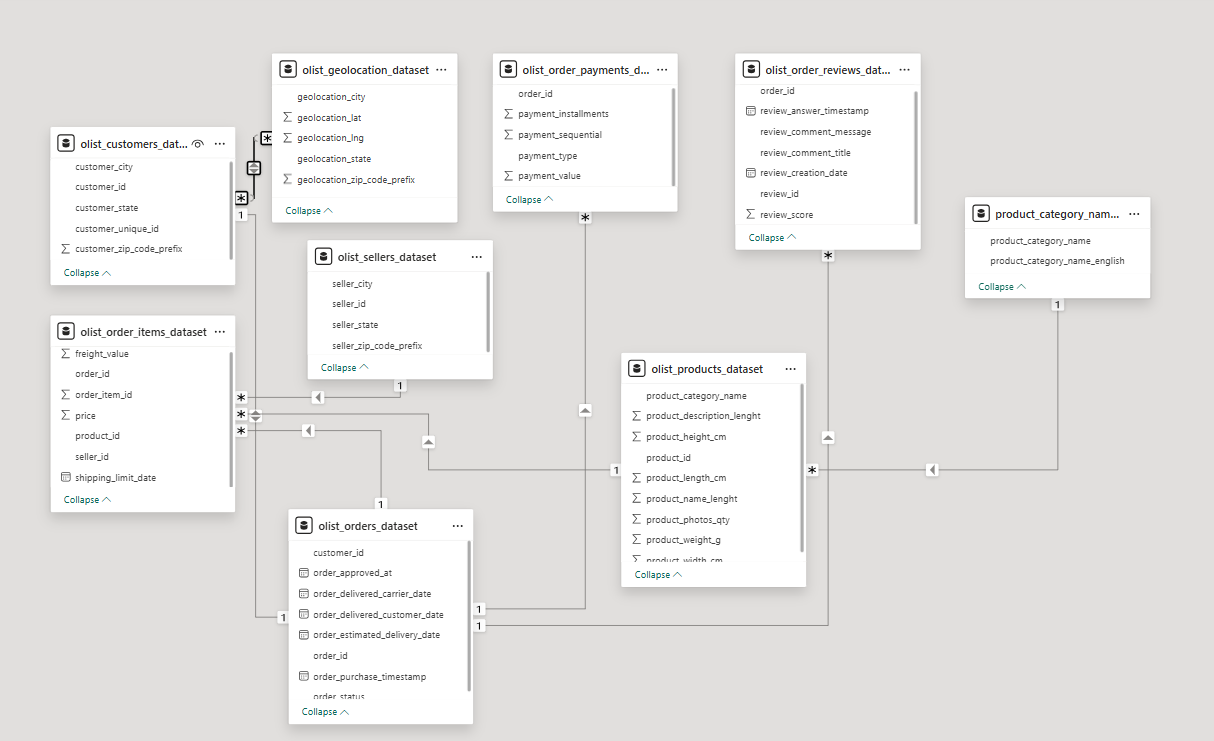

In [ ]:
# load image scema
from IPython.display import Image
Image(filename='scema model.PNG')

In [ ]:
# build coonection
conn = sql.connect(':memory:')
customers.to_sql('customers', conn, index=False, if_exists='replace')
geolocation.to_sql('geolocation', conn, index=False, if_exists='replace')
order_items.to_sql('order_items', conn, index=False, if_exists='replace')
order_payments.to_sql('order_payments', conn, index=False, if_exists='replace')
order_reviews.to_sql('order_reviews', conn, index=False, if_exists='replace')
orders.to_sql('orders', conn, index=False, if_exists='replace')
products.to_sql('products', conn, index=False, if_exists='replace')
sellers.to_sql('sellers', conn, index=False, if_exists='replace')
product_category_name_translation.to_sql('product_category_name_translation', conn, index=False, if_exists='replace')

# Example SQL query
query = """
SELECT *
FROM customers
LIMIT 5;
"""

df_result = pd.read_sql_query(query, conn)
print(df_result)



                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP  


In [ ]:
# Q1 List all unique states where customers are located
query = """
SELECT DISTINCT customer_state
FROM customers;
"""

Q1 = pd.read_sql_query(query, conn)
Q1

,customer_state
0,SP
1,SC
2,MG
3,PR
4,RJ
5,RS
6,PA
7,GO
8,ES
9,BA


In [ ]:
# Q2 Show the count of orders per customer.
query = """
SELECT customer_id, COUNT(order_id) AS order_count
FROM orders
GROUP BY customer_id;
"""

Q2 = pd.read_sql_query(query, conn)
Q2

,customer_id,order_count
0,00012a2ce6f8dcda20d059ce98491703,1
1,000161a058600d5901f007fab4c27140,1
2,0001fd6190edaaf884bcaf3d49edf079,1
3,0002414f95344307404f0ace7a26f1d5,1
4,000379cdec625522490c315e70c7a9fb,1
...,...,...
99436,fffecc9f79fd8c764f843e9951b11341,1
99437,fffeda5b6d849fbd39689bb92087f431,1
99438,ffff42319e9b2d713724ae527742af25,1
99439,ffffa3172527f765de70084a7e53aae8,1


In [ ]:
# Q3 What is the average payment value across all orders?
query = """
SELECT AVG(payment_value) AS avg_payment_value
FROM order_payments;
"""

Q3 = pd.read_sql_query(query, conn)
Q3

,avg_payment_value
0,154.10038


In [ ]:
# Q4 List all products in the dataset with their category (in English).
query = """
SELECT p.product_id, p.product_category_name, pt.product_category_name_english
FROM products p
JOIN product_category_name_translation pt ON p.product_category_name = pt.product_category_name;
"""

Q4 = pd.read_sql_query(query, conn)
Q4

,product_id,product_category_name,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,housewares
...,...,...,...
32323,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,furniture_decor
32324,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,construction_tools_lights
32325,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,bed_bath_table
32326,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,computers_accessories


In [ ]:
# Q5 Show the number of orders per seller.
query = """
SELECT seller_id, COUNT(order_id) AS order_count
FROM order_items
GROUP BY seller_id;
"""

Q5 = pd.read_sql_query(query, conn)
Q5

,seller_id,order_count
0,0015a82c2db000af6aaaf3ae2ecb0532,3
1,001cca7ae9ae17fb1caed9dfb1094831,239
2,001e6ad469a905060d959994f1b41e4f,1
3,002100f778ceb8431b7a1020ff7ab48f,55
4,003554e2dce176b5555353e4f3555ac8,1
...,...,...
3090,ffcfefa19b08742c5d315f2791395ee5,1
3091,ffdd9f82b9a447f6f8d4b91554cc7dd3,20
3092,ffeee66ac5d5a62fe688b9d26f83f534,14
3093,fffd5413c0700ac820c7069d66d98c89,61


In [ ]:
# Q6 How many sellers are in each state?
query = """
SELECT seller_state, COUNT(seller_id) AS seller_count
FROM sellers
GROUP BY seller_state;
"""

Q6 = pd.read_sql_query(query, conn)
Q6

,seller_state,seller_count
0,AC,1
1,AM,1
2,BA,19
3,CE,13
4,DF,30
5,ES,23
6,GO,40
7,MA,1
8,MG,244
9,MS,5


In [ ]:
# Q7 What is the total number of customers?
query = """
SELECT COUNT(DISTINCT customer_id) AS total_customers
FROM customers;
"""

Q7 = pd.read_sql_query(query, conn)
Q7

,total_customers
0,99441


In [ ]:
# Q8 . What are the distinct payment types used?
query = """
SELECT DISTINCT payment_type
FROM order_payments;
"""

Q8 = pd.read_sql_query(query, conn)
Q8

,payment_type
0,credit_card
1,boleto
2,voucher
3,debit_card
4,not_defined


In [ ]:
# Q9 How many orders were delivered on time vs. late?
query = """
SELECT
  COUNT(CASE WHEN order_delivered_customer_date <= order_estimated_delivery_date THEN 1 END) AS on_time_deliveries,
  COUNT(CASE WHEN order_delivered_customer_date > order_estimated_delivery_date THEN 1 END) AS late_deliveries
FROM orders;
"""

Q9 = pd.read_sql_query(query, conn)
Q9

,on_time_deliveries,late_deliveries
0,88649,7827


In [ ]:
query = """
SELECT
  CASE
     WHEN order_delivered_customer_date <= order_estimated_delivery_date THEN 'On Time'
    WHEN order_delivered_customer_date > order_estimated_delivery_date THEN 'Late'
    ELSE 'Not Delivered'
  END AS delivery_status,
  COUNT(*) AS total_orders
FROM orders
WHERE order_delivered_customer_date IS NOT NULL
GROUP BY delivery_status;
"""
Q9 = pd.read_sql_query(query, conn)
Q9

,delivery_status,total_orders
0,Late,7827
1,On Time,88649


In [ ]:
# Q10 Find the maximum and minimum product prices.

query = """
SELECT MAX(price) AS max_price, MIN(price) AS min_price
FROM order_items;
"""

Q10 = pd.read_sql_query(query, conn)
Q10

,max_price,min_price
0,6735.0,0.85


In [ ]:
# costomer table preview
query = """
SELECT *
FROM customers
LIMIT 5;
"""

Q = pd.read_sql_query(query, conn)
Q

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:
# Q11 What are the top 5 states with the most orders?
query = """
SELECT  c.customer_state, COUNT(o.order_id) AS order_count
FROM customers c
JOIN orders o ON c.customer_id = o.customer_id
GROUP BY c.customer_state
ORDER BY order_count DESC
LIMIT 5;
"""

Q11 = pd.read_sql_query(query, conn)
Q11

,customer_state,order_count
0,SP,41746
1,RJ,12852
2,MG,11635
3,RS,5466
4,PR,5045


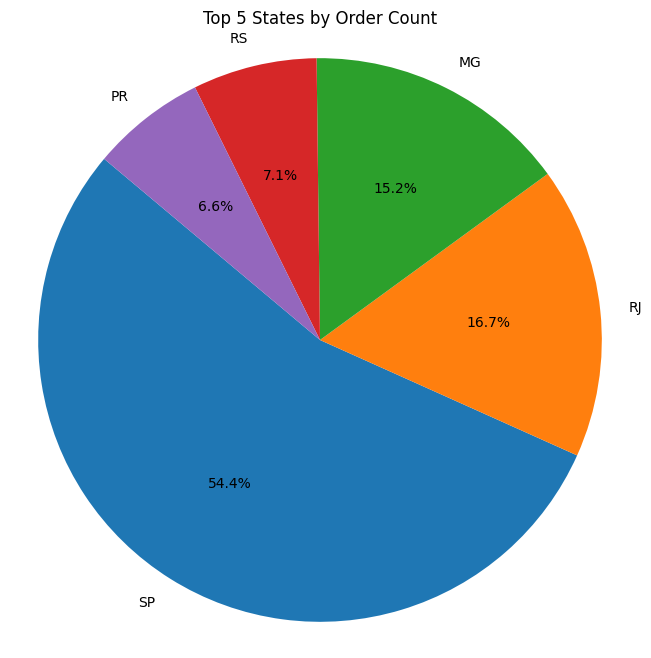

In [ ]:
# q12 PIE CHART OF Q11
plt.figure(figsize=(8, 8))
plt.pie(Q11['order_count'], labels=Q11['customer_state'], autopct='%1.1f%%', startangle=140)
plt.title('Top 5 States by Order Count')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:
# Q12 Calculate the average review score by product category.
query = """
SELECT pt.product_category_name_english, AVG(orv.review_score) AS avg_review_score
FROM order_reviews orv
JOIN order_items oi ON orv.order_id = oi.order_id
JOIN products p ON oi.product_id = p.product_id
JOIN product_category_name_translation pt ON p.product_category_name = pt.product_category_name
GROUP BY pt.product_category_name_english;
"""

Q12 = pd.read_sql_query(query, conn)
Q12

,product_category_name_english,avg_review_score
0,agro_industry_and_commerce,4.000000
1,air_conditioning,3.969178
2,art,3.937198
3,arts_and_craftmanship,4.125000
4,audio,3.825485
...,...,...
66,stationery,4.193857
67,tablets_printing_image,4.123457
68,telephony,3.946867
69,toys,4.158641


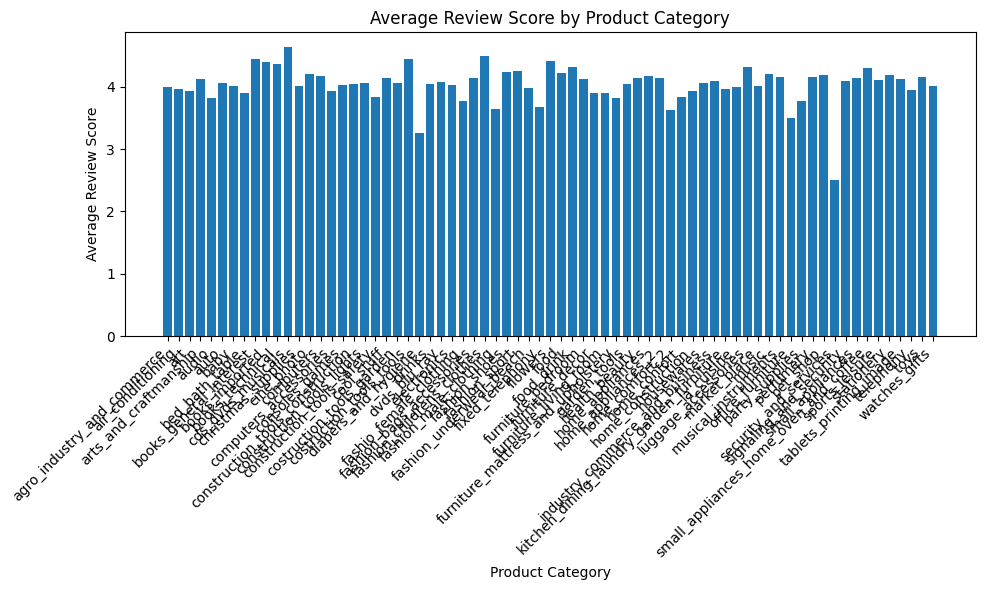

In [ ]:
# bar pllot Q12
plt.figure(figsize=(10, 6))
plt.bar(Q12['product_category_name_english'], Q12['avg_review_score'])
plt.xlabel('Product Category')
plt.ylabel('Average Review Score')
plt.title('Average Review Score by Product Category')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# Q13 Get the total revenue per seller.
query = """
SELECT s.seller_id, SUM(oi.price) AS total_revenue
FROM sellers s
JOIN order_items oi ON s.seller_id = oi.seller_id
GROUP BY s.seller_id;
"""
Q13 = pd.read_sql_query(query, conn)
Q13


,seller_id,total_revenue
0,0015a82c2db000af6aaaf3ae2ecb0532,2685.00
1,001cca7ae9ae17fb1caed9dfb1094831,25080.03
2,001e6ad469a905060d959994f1b41e4f,250.00
3,002100f778ceb8431b7a1020ff7ab48f,1234.50
4,003554e2dce176b5555353e4f3555ac8,120.00
...,...,...
3090,ffcfefa19b08742c5d315f2791395ee5,69.90
3091,ffdd9f82b9a447f6f8d4b91554cc7dd3,2101.20
3092,ffeee66ac5d5a62fe688b9d26f83f534,1839.86
3093,fffd5413c0700ac820c7069d66d98c89,9062.30


In [ ]:
# Q14 Count how many products belong to each product category.
query = """
SELECT pt.product_category_name_english, COUNT(p.product_id) AS product_count
FROM products p
JOIN product_category_name_translation pt ON p.product_category_name = pt.product_category_name
GROUP BY pt.product_category_name_english;
"""
Q14 = pd.read_sql_query(query, conn)
Q14

,product_category_name_english,product_count
0,agro_industry_and_commerce,74
1,air_conditioning,124
2,art,55
3,arts_and_craftmanship,19
4,audio,58
...,...,...
66,stationery,849
67,tablets_printing_image,9
68,telephony,1134
69,toys,1411


In [ ]:
# Q15 What’s the total freight value per order?
query = """
SELECT order_id, SUM(freight_value) AS total_freight_value
FROM order_items
GROUP BY order_id;
"""
Q15 = pd.read_sql_query(query, conn)
Q15



,order_id,total_freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,13.29
1,00018f77f2f0320c557190d7a144bdd3,19.93
2,000229ec398224ef6ca0657da4fc703e,17.87
3,00024acbcdf0a6daa1e931b038114c75,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,18.14
...,...,...
98661,fffc94f6ce00a00581880bf54a75a037,43.41
98662,fffcd46ef2263f404302a634eb57f7eb,36.53
98663,fffce4705a9662cd70adb13d4a31832d,16.95
98664,fffe18544ffabc95dfada21779c9644f,8.72


In [ ]:
# Q16 List customers with more than 5 orders.
query = """ SELECT c.customer_id, c.customer_unique_id, COUNT(o.order_id) AS order_count
FROM customers c
JOIN orders o ON c.customer_id = o.customer_id
GROUP BY c.customer_id, c.customer_unique_id
HAVING COUNT(o.order_id) > 5;
"""
Q16 = pd.read_sql_query(query, conn)
Q16


,customer_id,customer_unique_id,order_count


In [ ]:
# Q17 Join orders with reviews and show order_id, score, and review comment message.
query = """
SELECT o.order_id, orv.review_score, orv.review_comment_message
FROM orders o
JOIN order_reviews orv ON o.order_id = orv.order_id;
"""
Q17 = pd.read_sql_query(query, conn)
Q17

,order_id,review_score,review_comment_message
0,e481f51cbdc54678b7cc49136f2d6af7,4,"Não testei o produto ainda, mas ele veio corre..."
1,53cdb2fc8bc7dce0b6741e2150273451,4,Muito bom o produto.
2,47770eb9100c2d0c44946d9cf07ec65d,5,None
3,949d5b44dbf5de918fe9c16f97b45f8a,5,O produto foi exatamente o que eu esperava e e...
4,ad21c59c0840e6cb83a9ceb5573f8159,5,None
...,...,...,...
99219,9c5dedf39a927c1b2549525ed64a053c,5,None
99220,63943bddc261676b46f01ca7ac2f7bd8,4,So uma peça que veio rachado mas tudo bem rs
99221,83c1379a015df1e13d02aae0204711ab,5,Foi entregue antes do prazo.
99222,11c177c8e97725db2631073c19f07b62,2,Foi entregue somente 1. Quero saber do outro p...


In [ ]:
# Q18 List all orders where payment was made in installments greater than 5.
query = """
SELECT o.order_id, op.payment_installments
FROM orders o
JOIN order_payments op ON o.order_id = op.order_id
WHERE op.payment_installments > 5;
"""
Q18 = pd.read_sql_query(query, conn)
Q18

,order_id,payment_installments
0,b81ef226f3fe1789b1e8b2acac839d17,8
1,ba78997921bbcdc1373bb41e913ab953,8
2,1f78449c87a54faf9e96e88ba1491fa9,6
3,d88e0d5fa41661ce03cf6cf336527646,8
4,12e5cfe0e4716b59afb0e0f4a3bd6570,10
...,...,...
16122,c11717d999ffc510a6441df946f0a94d,9
16123,f593228a7a25e9633ff78a4ce0d0d4cc,8
16124,c9b01bef18eb84888f0fd071b8413b38,6
16125,38d11c87fc409de31e930084abb0c7a4,7


In [ ]:
# Q19 Show the average number of days between purchase and delivery.
query = """
SELECT AVG(JULIANDAY(o.order_delivered_customer_date) - JULIANDAY(o.order_purchase_timestamp)) AS avg_delivery_time
FROM orders o
WHERE o.order_delivered_customer_date IS NOT NULL;
"""
Q19 = pd.read_sql_query(query, conn)
Q19

,avg_delivery_time
0,12.558702


In [ ]:
# Q20 Which product categories have the highest average price?
query = """
SELECT pt.product_category_name_english, AVG(oi.price) AS avg_price
FROM order_items oi
JOIN products p ON oi.product_id = p.product_id
JOIN product_category_name_translation pt ON p.product_category_name = pt.product_category_name
GROUP BY pt.product_category_name_english
ORDER BY avg_price DESC;
"""
Q20 = pd.read_sql_query(query, conn)
Q20


,product_category_name_english,avg_price
0,computers,1098.340542
1,small_appliances_home_oven_and_coffee,624.285658
2,home_appliances_2,476.124958
3,agro_industry_and_commerce,342.124858
4,musical_instruments,281.616000
...,...,...
66,food_drink,54.602446
67,cds_dvds_musicals,52.142857
68,diapers_and_hygiene,40.194615
69,flowers,33.637576


In [ ]:
# Q21 What is the median payment value for all orders?
query = """ SELECT AVG(payment_value) AS median_payment_value
FROM (
  SELECT op.order_id, SUM(op.payment_value) AS payment_value,
         ROW_NUMBER() OVER (ORDER BY SUM(op.payment_value)) AS row_num,
         COUNT(*) OVER () AS total_rows
  FROM order_payments op
  GROUP BY op.order_id
) AS subquery
WHERE row_num IN (FLOOR((total_rows + 1) / 2), CEIL((total_rows + 1) / 2));
"""
Q21 = pd.read_sql_query(query, conn)
Q21

,median_payment_value
0,105.29


In [ ]:
# Q22 Find sellers with sales above the average seller revenue.
query = """
SELECT s.seller_id, SUM(oi.price) AS total_revenue
FROM sellers s
JOIN order_items oi ON s.seller_id = oi.seller_id
GROUP BY s.seller_id
HAVING SUM(oi.price) > (SELECT AVG(total_revenue) FROM (SELECT SUM(oi.price) AS total_revenue
FROM order_items oi GROUP BY oi.seller_id) AS avg_revenue);
"""
Q22 = pd.read_sql_query(query, conn)
Q22

,seller_id,total_revenue
0,001cca7ae9ae17fb1caed9dfb1094831,25080.03
1,004c9cd9d87a3c30c522c48c4fc07416,19712.71
2,00ee68308b45bc5e2660cd833c3f81cc,20260.00
3,00fc707aaaad2d31347cf883cd2dfe10,12684.90
4,014c0679dd340a0e338872e7ec85666a,7058.00
...,...,...
623,ff063b022a9a0aab91bad2c9088760b7,12076.50
624,ff1fb4c404b2efe68b03350a8dc24122,6771.00
625,ff4ea69c2a729e83e63c7579e4ef8170,7017.00
626,ff69aa92bb6b1bf9b8b7a51c2ed9cf8b,21940.80


In [ ]:
# Q23 Using a CASE statement, categorize orders as 'Fast', 'On Time', or 'Late'.
query = """ SELECT order_id,
  CASE
    WHEN order_delivered_customer_date <= order_estimated_delivery_date THEN 'On Time'
    WHEN order_delivered_customer_date > order_estimated_delivery_date THEN 'Late'
    ELSE 'Fast'
  END AS delivery_status
FROM orders;
"""
Q23 = pd.read_sql_query(query, conn)
Q23


,order_id,delivery_status
0,e481f51cbdc54678b7cc49136f2d6af7,On Time
1,53cdb2fc8bc7dce0b6741e2150273451,On Time
2,47770eb9100c2d0c44946d9cf07ec65d,On Time
3,949d5b44dbf5de918fe9c16f97b45f8a,On Time
4,ad21c59c0840e6cb83a9ceb5573f8159,On Time
...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,On Time
99437,63943bddc261676b46f01ca7ac2f7bd8,On Time
99438,83c1379a015df1e13d02aae0204711ab,On Time
99439,11c177c8e97725db2631073c19f07b62,On Time


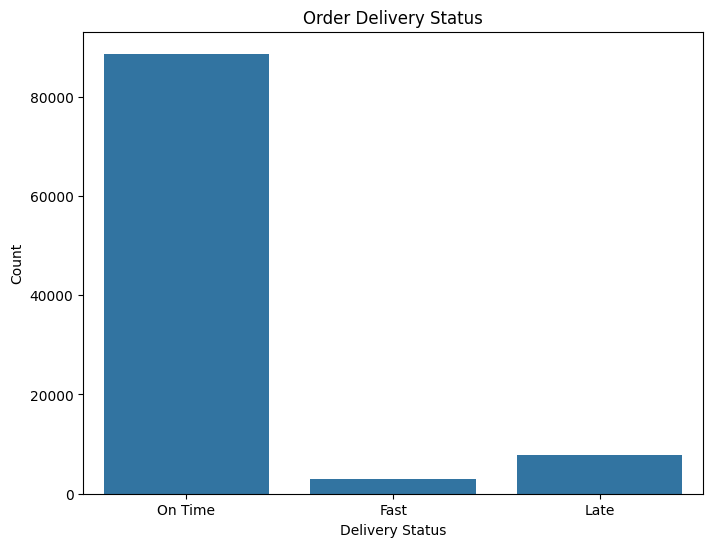

In [ ]:
# VISUALIZEE Q23
plt.figure(figsize=(8, 6))
sns.countplot(x='delivery_status', data=Q23)
plt.title('Order Delivery Status')
plt.xlabel('Delivery Status')
plt.ylabel('Count')
plt.show()

In [ ]:
# Q24 Show the cumulative revenue over time (using window functions).
query = """
SELECT order_purchase_timestamp,
       SUM(oi.price) OVER (ORDER BY order_purchase_timestamp) AS cumulative_revenue
FROM orders o
JOIN order_items oi ON o.order_id = oi.order_id;
"""
Q24 = pd.read_sql_query(query, conn)
Q24

,order_purchase_timestamp,cumulative_revenue
0,2016-09-04 21:15:19,7.289000e+01
1,2016-09-04 21:15:19,7.289000e+01
2,2016-09-05 00:15:34,1.323900e+02
3,2016-09-15 12:16:38,2.673600e+02
4,2016-09-15 12:16:38,2.673600e+02
...,...,...
112645,2018-08-29 14:18:23,1.359134e+07
112646,2018-08-29 14:18:28,1.359139e+07
112647,2018-08-29 14:52:00,1.359141e+07
112648,2018-08-29 15:00:37,1.359150e+07


In [ ]:
# Q25 Rank sellers by number of orders (dense rank).
query = """
SELECT s.seller_id, COUNT(oi.order_id) AS order_count,
       DENSE_RANK() OVER (ORDER BY COUNT(oi.order_id) DESC) AS rank
FROM sellers s
JOIN order_items oi ON s.seller_id = oi.seller_id
GROUP BY s.seller_id;
"""
Q25 = pd.read_sql_query(query, conn)
Q25

,seller_id,order_count,rank
0,6560211a19b47992c3666cc44a7e94c0,2033,1
1,4a3ca9315b744ce9f8e9374361493884,1987,2
2,1f50f920176fa81dab994f9023523100,1931,3
3,cc419e0650a3c5ba77189a1882b7556a,1775,4
4,da8622b14eb17ae2831f4ac5b9dab84a,1551,5
...,...,...,...
3090,04ee0ec01589969663ba5967c0e0bdc0,1,257
3091,00d8b143d12632bad99c0ad66ad52825,1,257
3092,00ab3eff1b5192e5f1a63bcecfee11c8,1,257
3093,003554e2dce176b5555353e4f3555ac8,1,257


In [ ]:
# Q26 Find the top 3 most reviewed products by number of reviews.
query = """
SELECT p.product_id, p.product_category_name, COUNT(orv.review_id) AS review_count
FROM products p
JOIN order_items oi ON p.product_id = oi.product_id
JOIN order_reviews orv ON oi.order_id = orv.order_id
GROUP BY p.product_id, p.product_category_name
ORDER BY review_count DESC
LIMIT 3;
"""

Q26 = pd.read_sql_query(query, conn)
Q26
#

,product_id,product_category_name,review_count
0,aca2eb7d00ea1a7b8ebd4e68314663af,moveis_decoracao,524
1,422879e10f46682990de24d770e7f83d,ferramentas_jardim,486
2,99a4788cb24856965c36a24e339b6058,cama_mesa_banho,482


In [ ]:
# Q27 Calculate the return rate (orders with review score < 3 / total orders).
query = """
SELECT
  (COUNT(CASE WHEN orv.review_score < 3 THEN 1 END)
   / COUNT(DISTINCT o.order_id)) * 100 AS return_rate
FROM orders o
LEFT JOIN order_reviews orv ON o.order_id = orv.order_id;
"""
Q27 = pd.read_sql_query(query, conn)
Q27

,return_rate
0,0


In [ ]:
# Refined Q27: Calculate return rate based on review comments indicating a return
query = """
SELECT
  CAST(SUM(CASE WHEN orv.review_comment_message LIKE '%return%'
                OR orv.review_comment_message LIKE '%devolver%'
                OR orv.review_comment_message LIKE '%troca%'
                OR orv.review_comment_message LIKE '%devolucao%'
                THEN 1 ELSE 0 END) AS REAL)
  * 100
  / COUNT(DISTINCT o.order_id) AS return_rate
FROM orders o
LEFT JOIN order_reviews orv ON o.order_id = orv.order_id
WHERE orv.review_comment_message IS NOT NULL;
"""
Q27_refined = pd.read_sql_query(query, conn)
Q27_refined

,return_rate
0,2.086394


In [ ]:
# Q28 Which product category has the most variation in prices?
query = """ SELECT pt.product_category_name_english, COUNT(DISTINCT oi.price) AS price_variation
FROM order_items oi
JOIN products p ON oi.product_id = p.product_id
JOIN product_category_name_translation pt ON p.product_category_name = pt.product_category_name
GROUP BY pt.product_category_name_english
ORDER BY price_variation DESC
LIMIT 1;
"""
Q28 = pd.read_sql_query(query, conn)
print("Q28",Q28)

# Q29 Identify orders where the number of payment installments is more than the average.
query = """ SELECT o.order_id, op.payment_installments
FROM orders o
JOIN order_payments op ON o.order_id = op.order_id
WHERE op.payment_installments > (SELECT AVG(payment_installments) FROM order_payments);
"""
Q29 = pd.read_sql_query(query, conn)
print("Q29",Q29)

# Q30 Find the average delivery time by customer state.
query = """ SELECT c.customer_state, AVG(JULIANDAY(o.order_delivered_customer_date) - JULIANDAY(o.order_purchase_timestamp)) AS avg_delivery_time
FROM customers c
JOIN orders o ON c.customer_id = o.customer_id
WHERE o.order_delivered_customer_date IS NOT NULL
GROUP BY c.customer_state;
"""
Q30 = pd.read_sql_query(query, conn)
print("Q30",Q30)


Q28   product_category_name_english  price_variation
0                 health_beauty             1263
Q29                                order_id  payment_installments
0      b81ef226f3fe1789b1e8b2acac839d17                     8
1      ba78997921bbcdc1373bb41e913ab953                     8
2      3d7239c394a212faae122962df514ac7                     3
3      1f78449c87a54faf9e96e88ba1491fa9                     6
4      d88e0d5fa41661ce03cf6cf336527646                     8
...                                 ...                   ...
38920  38d11c87fc409de31e930084abb0c7a4                     7
38921  60aed0a4eba0e424eb3cac85017fd752                    10
38922  2e3d96522c8c378d4135c12a65c977aa                     4
38923  7159096c5aa9be77f7f0c26c01ee9793                     4
38924  b8b61059626efa996a60be9bb9320e10                     5

[38925 rows x 2 columns]
Q30    customer_state  avg_delivery_time
0              AC          21.035713
1              AL          24.543855
2        

In [ ]:
# Q31 Calculate the customer lifetime value (CLV) as total payments per customer.
query = """ SELECT c.customer_id, SUM(op.payment_value) AS total_payments
FROM customers c
JOIN orders o ON c.customer_id = o.customer_id
JOIN order_payments op ON o.order_id = op.order_id
GROUP BY c.customer_id;
"""
Q31 = pd.read_sql_query(query, conn)
print("Q31",Q31)

# Q32 Identify customer cohorts by first order month and their repeat behavior.
query = """ SELECT strftime('%Y-%m', o.order_purchase_timestamp) AS first_order_month,
       c.customer_id,
       COUNT(DISTINCT o.order_id) AS total_orders,
       COUNT(CASE WHEN o.order_delivered_customer_date IS NOT NULL THEN 1 END) AS repeat_orders
FROM customers c
JOIN orders o ON c.customer_id = o.customer_id
GROUP BY first_order_month, c.customer_id;
"""
Q32 = pd.read_sql_query(query, conn)
print("Q32",Q32)


# Q33 Detect anomalies: orders with 0 payment or null delivery dates.
query = """ SELECT o.order_id, op.payment_value, o.order_delivered_customer_date
FROM orders o
LEFT JOIN order_payments op ON o.order_id = op.order_id
WHERE op.payment_value IS NULL OR o.order_delivered_customer_date IS NULL;
"""
Q33 = pd.read_sql_query(query, conn)
print("Q33",Q33)


# Q34 Get the top 5% of sellers by sales volume.
query = """ SELECT s.seller_id, SUM(oi.price) AS total_sales
FROM sellers s
JOIN order_items oi ON s.seller_id = oi.seller_id
GROUP BY s.seller_id
ORDER BY total_sales
DESC LIMIT (SELECT CAST(COUNT(DISTINCT seller_id) * 0.05 AS INTEGER) FROM sellers);
"""
Q34 = pd.read_sql_query(query, conn)
print("Q34",Q34)


# Q35 Show average and median delivery delay by seller.
# SQLite does not support PERCENTILE_CONT, so we calculate median manually
query = """
WITH SellerDeliveryTimes AS (
  SELECT
    s.seller_id,
    JULIANDAY(o.order_delivered_customer_date) - JULIANDAY(o.order_purchase_timestamp) AS delivery_delay,
    ROW_NUMBER() OVER(PARTITION BY s.seller_id ORDER BY JULIANDAY(o.order_delivered_customer_date) - JULIANDAY(o.order_purchase_timestamp)) as rn,
    COUNT(*) OVER(PARTITION BY s.seller_id) as cnt
  FROM sellers s
  JOIN order_items oi ON s.seller_id = oi.seller_id
  JOIN orders o ON oi.order_id = o.order_id
  WHERE o.order_delivered_customer_date IS NOT NULL
)
SELECT
  seller_id,
  AVG(delivery_delay) AS avg_delivery_delay,
  AVG(CASE WHEN rn BETWEEN (cnt + 1) / 2.0 AND (cnt + 2) / 2.0 THEN delivery_delay ELSE NULL END) AS median_delivery_delay
FROM SellerDeliveryTimes
GROUP BY seller_id;
"""
Q35 = pd.read_sql_query(query, conn)
print("Q35",Q35)


# Q36 Calculate rolling 7-day order counts using window functions.
query = """
SELECT
    DATE(order_purchase_timestamp) AS order_date,
    COUNT(order_id) OVER (ORDER BY DATE(order_purchase_timestamp) ROWS BETWEEN 6 PRECEDING AND CURRENT ROW) AS rolling_7_day_order_count
FROM orders
GROUP BY order_date
ORDER BY order_date;
"""
Q36 = pd.read_sql_query(query, conn)
print("Q36",Q36)


# Q37 Compare review score average for prepaid vs installment-based payments.
query = """
SELECT
    CASE
        WHEN op.payment_installments = 1 THEN 'Prepaid'
        ELSE 'Installment-based'
    END AS payment_type_group,
    AVG(orv.review_score) AS avg_review_score
FROM order_payments op
JOIN order_reviews orv ON op.order_id = orv.order_id
GROUP BY payment_type_group;
"""
Q37 = pd.read_sql_query(query, conn)
print("Q37",Q37)


# Q38 Determine which product categories are most profitable (revenue - freight).
query = """
SELECT
    pt.product_category_name_english,
    SUM(oi.price) - SUM(oi.freight_value) AS total_profit
FROM order_items oi
JOIN products p ON oi.product_id = p.product_id
JOIN product_category_name_translation pt ON p.product_category_name = pt.product_category_name
GROUP BY pt.product_category_name_english
ORDER BY total_profit DESC;
"""
Q38 = pd.read_sql_query(query, conn)
print("Q38",Q38)

# Q39 Identify customers with more than 3 different sellers.
query = """
SELECT
    c.customer_id,
    COUNT(DISTINCT oi.seller_id) AS unique_sellers_count
FROM customers c
JOIN orders o ON c.customer_id = o.customer_id
JOIN order_items oi ON o.order_id = oi.order_id
GROUP BY c.customer_id
HAVING COUNT(DISTINCT oi.seller_id) > 3;
"""
Q39 = pd.read_sql_query(query, conn)
print("Q39",Q39)

# Q40 List sellers with more than 90% of their orders rated 5 stars.
query = """
WITH SellerReviews AS (
    SELECT
        oi.seller_id,
        orv.review_score,
        COUNT(DISTINCT oi.order_id) AS total_orders,
        SUM(CASE WHEN orv.review_score = 5 THEN 1 ELSE 0 END) AS five_star_orders
    FROM order_items oi
    JOIN order_reviews orv ON oi.order_id = orv.order_id
    GROUP BY oi.seller_id, orv.review_score
)
SELECT
    seller_id,
    SUM(five_star_orders) AS total_five_star_orders,
    SUM(total_orders) AS total_seller_orders,
    CAST(SUM(five_star_orders) AS REAL) * 100 / SUM(total_orders) AS five_star_percentage
FROM SellerReviews
GROUP BY seller_id
HAVING CAST(SUM(five_star_orders) AS REAL) * 100 / SUM(total_orders) > 90;
"""
Q40 = pd.read_sql_query(query, conn)
print("Q40",Q40)

Q31                             customer_id  total_payments
0      00012a2ce6f8dcda20d059ce98491703          114.74
1      000161a058600d5901f007fab4c27140           67.41
2      0001fd6190edaaf884bcaf3d49edf079          195.42
3      0002414f95344307404f0ace7a26f1d5          179.35
4      000379cdec625522490c315e70c7a9fb          107.01
...                                 ...             ...
99435  fffecc9f79fd8c764f843e9951b11341           81.36
99436  fffeda5b6d849fbd39689bb92087f431           63.13
99437  ffff42319e9b2d713724ae527742af25          214.13
99438  ffffa3172527f765de70084a7e53aae8           45.50
99439  ffffe8b65bbe3087b653a978c870db99           18.37

[99440 rows x 2 columns]
Q32       first_order_month                       customer_id  total_orders  \
0               2016-09  08c5351a6aca1c1589a38f244edeee9d             1   
1               2016-09  622e13439d6b5a0b486c435618b2679e             1   
2               2016-09  683c54fc24d40ee9f8a6fc179fd9856c            

In [ ]:
# Q41 Which states generate the most revenue?
query = """ SELECT c.customer_state, SUM(oi.price) AS total_revenue
FROM customers c
JOIN orders o ON c.customer_id = o.customer_id
JOIN order_items oi ON o.order_id = oi.order_id
GROUP BY c.customer_state
ORDER BY total_revenue DESC;
"""
Q41 = pd.read_sql_query(query, conn)
print("Q41",Q41)

# Q42 What's the delivery time trend over the past 12 months?
query = """
SELECT
    strftime('%Y-%m', o.order_purchase_timestamp) AS order_month,
    AVG(JULIANDAY(o.order_delivered_customer_date) - JULIANDAY(o.order_purchase_timestamp)) AS avg_delivery_time
FROM orders o
WHERE o.order_delivered_customer_date IS NOT NULL
  AND o.order_purchase_timestamp >= date('now', '-12 months')
GROUP BY order_month
ORDER BY order_month;
"""
Q42 = pd.read_sql_query(query, conn)
print("Q42",Q42)

# Q43 Find the correlation between review scores and delivery delays.
# This requires more complex analysis outside of a single SQL query, possibly using Python after fetching the data.
# We'll fetch the necessary data and perform the correlation calculation in Python.
query_q43 = """
SELECT
    orv.review_score,
    JULIANDAY(o.order_delivered_customer_date) - JULIANDAY(o.order_purchase_timestamp) AS delivery_delay
FROM orders o
JOIN order_reviews orv ON o.order_id = orv.order_id
WHERE o.order_delivered_customer_date IS NOT NULL;
"""
Q43_data = pd.read_sql_query(query_q43, conn)

# Calculate correlation in Python
correlation = Q43_data['review_score'].corr(Q43_data['delivery_delay'])
print("Q43 Correlation between review scores and delivery delays:", correlation)


# Q44 Identify peak ordering hours and days of the week.
query_q44_hour = """
SELECT
    strftime('%H', order_purchase_timestamp) AS order_hour,
    COUNT(order_id) AS order_count
FROM orders
GROUP BY order_hour
ORDER BY order_count DESC;
"""
Q44_hour = pd.read_sql_query(query_q44_hour, conn)
print("Q44 Peak ordering hours:\n", Q44_hour)

query_q44_day = """
SELECT
    strftime('%w', order_purchase_timestamp) AS order_day_of_week, -- 0 for Sunday, 1 for Monday, etc.
    COUNT(order_id) AS order_count
FROM orders
GROUP BY order_day_of_week
ORDER BY order_count DESC;
"""
Q44_day = pd.read_sql_query(query_q44_day, conn)
print("Q44 Peak ordering days of the week:\n", Q44_day)


# Q45 Are more expensive products reviewed better on average?
query_q45 = """
SELECT
    CASE
        WHEN oi.price < 50 THEN 'Low Price'
        WHEN oi.price >= 50 AND oi.price < 200 THEN 'Medium Price'
        ELSE 'High Price'
    END AS price_category,
    AVG(orv.review_score) AS avg_review_score
FROM order_items oi
JOIN order_reviews orv ON oi.order_id = orv.order_id
GROUP BY price_category
ORDER BY avg_review_score DESC;
"""
Q45 = pd.read_sql_query(query_q45, conn)
print("Q45 Average review score by price category:\n", Q45)


# Q46 Which regions have the slowest delivery time?
query_q46 = """
SELECT
    c.customer_state,
    AVG(JULIANDAY(o.order_delivered_customer_date) - JULIANDAY(o.order_purchase_timestamp)) AS avg_delivery_time
FROM customers c
JOIN orders o ON c.customer_id = o.customer_id
WHERE o.order_delivered_customer_date IS NOT NULL
GROUP BY c.customer_state
ORDER BY avg_delivery_time DESC;
"""
Q46 = pd.read_sql_query(query_q46, conn)
print("Q46 Average delivery time by customer state:\n", Q46)


# Q47 Analyze how product variety affects customer retention.
# This requires tracking unique products purchased by customers over time, which is complex.
# We can start by looking at the number of distinct products purchased per customer.
query_q47 = """
SELECT
    c.customer_unique_id,
    COUNT(DISTINCT oi.product_id) AS distinct_products_count,
    COUNT(DISTINCT o.order_id) AS total_orders
FROM customers c
JOIN orders o ON c.customer_id = o.customer_id
JOIN order_items oi ON o.order_id = oi.order_id
GROUP BY c.customer_unique_id
ORDER BY distinct_products_count DESC;
"""
Q47 = pd.read_sql_query(query_q47, conn)
print("Q47 Distinct products purchased and total orders per customer:\n", Q47)


# Q48 What percentage of orders use more than one payment method?
query_q48 = """
SELECT
    CAST(SUM(CASE WHEN payment_method_count > 1 THEN 1 ELSE 0 END) AS REAL) * 100 / COUNT(order_id) AS percentage_multiple_payments
FROM (
    SELECT
        order_id,
        COUNT(DISTINCT payment_type) AS payment_method_count
    FROM order_payments
    GROUP BY order_id
) AS order_payment_methods;
"""
Q48 = pd.read_sql_query(query_q48, conn)
print("Q48 Percentage of orders with multiple payment methods:\n", Q48)


Q41    customer_state  total_revenue
0              SP   5.202955e+06
1              RJ   1.824093e+06
2              MG   1.585308e+06
3              RS   7.503040e+05
4              PR   6.830838e+05
5              SC   5.205533e+05
6              BA   5.113500e+05
7              DF   3.026039e+05
8              GO   2.945919e+05
9              ES   2.750373e+05
10             PE   2.627880e+05
11             CE   2.272547e+05
12             PA   1.789478e+05
13             MT   1.564535e+05
14             MA   1.196482e+05
15             MS   1.168126e+05
16             PB   1.152681e+05
17             PI   8.691408e+04
18             RN   8.303498e+04
19             AL   8.031481e+04
20             SE   5.892085e+04
21             TO   4.962174e+04
22             RO   4.614064e+04
23             AM   2.235684e+04
24             AC   1.598295e+04
25             AP   1.347430e+04
26             RR   7.829430e+03
Q42 Empty DataFrame
Columns: [order_month, avg_delivery_time]
Index: []


In [ ]:
# Q49 Track seller growth month over month.
# We will adjust the query to track growth based on the month of their first order item.
query_q49_corrected = """
WITH SellerFirstOrder AS (
    SELECT
        oi.seller_id,
        MIN(o.order_purchase_timestamp) AS first_order_timestamp
    FROM order_items oi
    JOIN orders o ON oi.order_id = o.order_id
    GROUP BY oi.seller_id
)
SELECT
    strftime('%Y-%m', first_order_timestamp) AS seller_first_order_month,
    COUNT(DISTINCT s.seller_id) AS new_sellers_count
FROM sellers s
JOIN SellerFirstOrder sfo ON s.seller_id = sfo.seller_id
GROUP BY seller_first_order_month
ORDER BY seller_first_order_month;
"""
Q49 = pd.read_sql_query(query_q49_corrected, conn)
print("Q49 Seller growth month over month (based on first order):\n", Q49)


# Q50 Estimate lost revenue from late deliveries (if returned or rated poorly).
# This requires combining delivery delay with review scores and potentially return indicators.
# We can estimate lost revenue for late deliveries with a review score of 1 or 2.
query_q50 = """
SELECT
    SUM(CASE WHEN (JULIANDAY(o.order_delivered_customer_date) > JULIANDAY(o.order_estimated_delivery_date))
              AND orv.review_score <= 2 THEN oi.price ELSE 0 END) AS estimated_lost_revenue
FROM orders o
JOIN order_items oi ON o.order_id = oi.order_id
LEFT JOIN order_reviews orv ON o.order_id = orv.order_id
WHERE o.order_delivered_customer_date IS NOT NULL;
"""
Q50 = pd.read_sql_query(query_q50, conn)
print("Q50 Estimated lost revenue from late deliveries with low review scores:", Q50)

Q49 Seller growth month over month (based on first order):
    seller_first_order_month  new_sellers_count
0                   2016-09                  3
1                   2016-10                141
2                   2016-12                  1
3                   2017-01                151
4                   2017-02                228
5                   2017-03                173
6                   2017-04                116
7                   2017-05                124
8                   2017-06                 76
9                   2017-07                115
10                  2017-08                129
11                  2017-09                127
12                  2017-10                147
13                  2017-11                190
14                  2017-12                 90
15                  2018-01                141
16                  2018-02                120
17                  2018-03                113
18                  2018-04                202
